In [8]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

Mounted at /content/drive


In [9]:
log=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/log_data.csv')

In [10]:
df_no = pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청x클러.csv',index_col=0)

In [11]:
df_no

,desired_amount,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,labels
user_id,,,,,,,,,
1,5.000000e+05,None,750.000000,0.000000,Cluster 7,LIVING,unknown,2.000000e+07,0
7,1.000000e+07,None,580.000000,34.000000,None,LIVING,unknown,2.200000e+07,0
12,1.071429e+06,Cluster 5,482.142857,6.857143,Cluster 7,LIVING,unknown,3.221429e+07,0
19,2.000000e+07,Cluster 5,612.241725,0.000000,None,LIVING,D,0.000000e+00,0
30,7.000000e+06,Cluster 5,664.285714,1.000000,Cluster 7,LIVING,unknown,3.228571e+07,0
...,...,...,...,...,...,...,...,...,...
879669,1.025000e+07,Cluster 5,390.000000,2.500000,Cluster 7,BUSINESS,unknown,1.550000e+08,0
879670,5.000000e+06,None,510.000000,6.000000,Cluster 7,LIVING,B,1.200000e+07,0
879681,1.000000e+07,Cluster 5,560.000000,23.500000,Cluster 7,LIVING,unknown,4.500000e+07,0


In [12]:
#radar 차트를 만들기 위한 minmax스케일링
from sklearn.preprocessing import MinMaxScaler
df_no.loc[:,['yearly_income','desired_amount','working month']] = np.log1p(df_no.loc[:,['yearly_income','desired_amount','working month']])
scaler = MinMaxScaler()
scaler.fit(df_no.iloc[:,[0,2,3,7]])
df_no.iloc[:,[0,2,3,7]]=scaler.transform(df_no.iloc[:,[0,2,3,7]])
df_no.describe

<bound method NDFrame.describe of          desired_amount main_cluster  credit_score  working month sub_cluster  \
user_id                                                                         
1              0.569897         None      0.667523       0.000000   Cluster 7   
7              0.700000         None      0.492940       0.487728        None   
12             0.602996    Cluster 5      0.392445       0.282789   Cluster 7   
19             0.730103    Cluster 5      0.526051       0.000000        None   
30             0.684510    Cluster 5      0.579498       0.095087   Cluster 7   
...                 ...          ...           ...            ...         ...   
879669         0.701072    Cluster 5      0.297818       0.171856   Cluster 7   
879670         0.669897         None      0.421053       0.266943   Cluster 7   
879681         0.700000    Cluster 5      0.472401       0.438799   Cluster 7   
879684         0.600000         None      0.154044       0.095087        No

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

## **연속형 변수**

In [14]:
df_mean=df_no.groupby('labels').mean()

In [15]:
df = df_mean.copy()

In [16]:
df['cluster_name']=df.index
df.index = range(3)
df.columns

Index(['desired_amount', 'credit_score', 'working month', 'yearly_income',
       'cluster_name'],
      dtype='object')

In [17]:
df=df[['cluster_name','desired_amount', 'credit_score', 'working month', 'yearly_income',
       ]]
df

,cluster_name,desired_amount,credit_score,working month,yearly_income
0,0,0.685858,0.434966,0.304529,0.726530
1,1,0.969106,0.409290,0.192369,0.752144
2,2,0.680861,0.386231,0.227527,0.964109


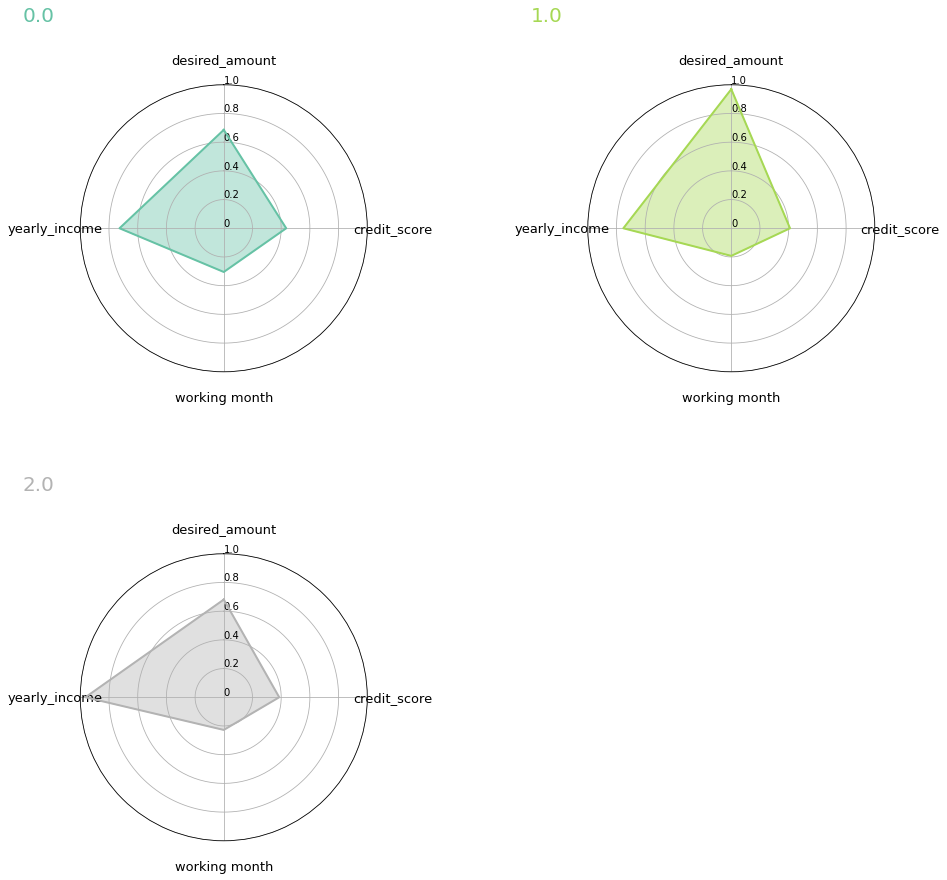

In [18]:
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('cluster_name').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.cluster_name, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
mpl.rcParams['font.size']=30
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청no-radar.png',dpi=600)

# **범주형 번수**

In [19]:
df_no

,desired_amount,main_cluster,credit_score,working month,sub_cluster,purpose,personal_rehab,yearly_income,labels
user_id,,,,,,,,,
1,0.569897,None,0.667523,0.000000,Cluster 7,LIVING,unknown,0.730422,0
7,0.700000,None,0.492940,0.487728,None,LIVING,unknown,0.734563,0
12,0.602996,Cluster 5,0.392445,0.282789,Cluster 7,LIVING,unknown,0.751133,0
19,0.730103,Cluster 5,0.526051,0.000000,None,LIVING,D,0.000000,0
30,0.684510,Cluster 5,0.579498,0.095087,Cluster 7,LIVING,unknown,0.751229,0
...,...,...,...,...,...,...,...,...,...
879669,0.701072,Cluster 5,0.297818,0.171856,Cluster 7,BUSINESS,unknown,0.819391,0
879670,0.669897,None,0.421053,0.266943,Cluster 7,LIVING,B,0.708227,0
879681,0.700000,Cluster 5,0.472401,0.438799,Cluster 7,LIVING,unknown,0.765655,0


In [20]:
obj=df_no.iloc[:,[1,4,5,6,8]]

In [21]:
obj

,main_cluster,sub_cluster,purpose,personal_rehab,labels
user_id,,,,,
1,None,Cluster 7,LIVING,unknown,0
7,None,None,LIVING,unknown,0
12,Cluster 5,Cluster 7,LIVING,unknown,0
19,Cluster 5,None,LIVING,D,0
30,Cluster 5,Cluster 7,LIVING,unknown,0
...,...,...,...,...,...
879669,Cluster 5,Cluster 7,BUSINESS,unknown,0
879670,None,Cluster 7,LIVING,B,0
879681,Cluster 5,Cluster 7,LIVING,unknown,0


In [22]:
mclu_obj=obj.groupby(['labels','main_cluster']).count()['purpose']
mclu_obj.groupby('labels').sum()

labels
0    74792
1       84
2       29
Name: purpose, dtype: int64

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
mpl.rcParams['font.size']=13

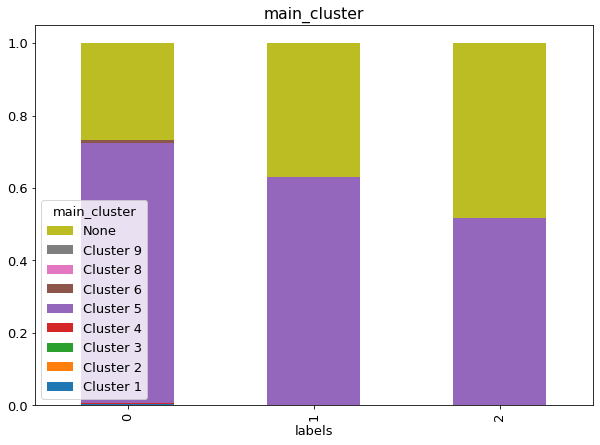

In [25]:
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('main_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청no-main시계열.png',dpi=600)

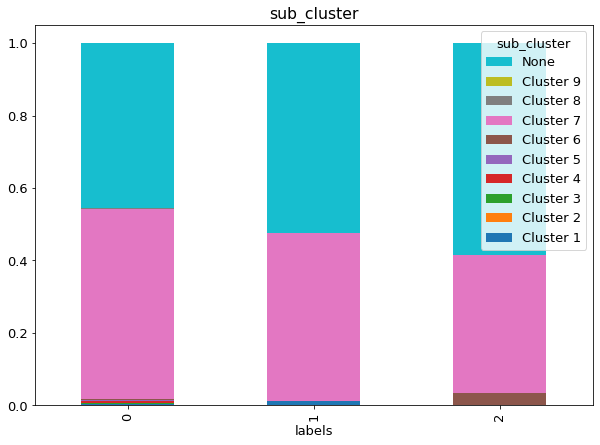

In [26]:
mclu_obj=obj.groupby(['labels','sub_cluster']).count()['purpose']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('sub_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청no-sub시계열.png',dpi=600)

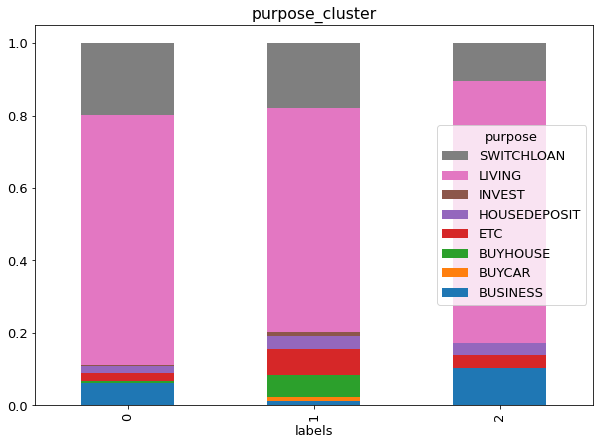

In [27]:
mclu_obj=obj.groupby(['labels','purpose']).count()['main_cluster']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('purpose_cluster')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청no-purpose.png',dpi=600)

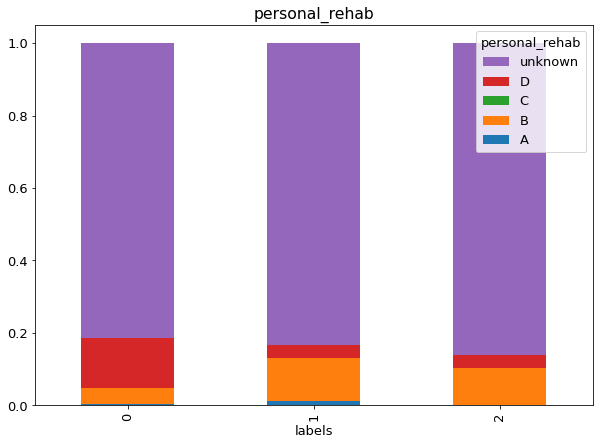

In [28]:
mclu_obj=obj.groupby(['labels','personal_rehab']).count()['main_cluster']
mclu_por=mclu_obj.unstack().T/mclu_obj.groupby('labels').sum()
mclu_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('personal_rehab')
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청no-personal_rehab.png',dpi=600)

## **프로세스 마이닝**

In [29]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 20.2 MB/s 
     |████████████████████████████████| 592 kB 60.9 MB/s 
     |████████████████████████████████| 1.6 MB 64.2 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.0-py3-none-any.whl size=600250 sha256=b048e1d08519c953c83fa5b90d16547f5994dcc648a74ef3f6373c4cc9ead55c
  Stored in directory: /root/.cache/pip/wheels/57/74/32/e404e0d76fbb2dc4e3791b821cfae6a69c1a6677ded99dc8b7
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23586 sha256=63de1b33db35c8bf88333b6d4b7489dbff764b0eaff1aca01dceabbb058ae428
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [30]:
from pm4py.objects.conversion.log import converter as log_converter

In [31]:
no_id_0= df_no[df_no['labels']==0].index
no_id_1= df_no[df_no['labels']==1].index
no_id_2= df_no[df_no['labels']==2].index


In [32]:
no_0_log=log[log['user_id'].isin(no_id_0)]
no_1_log=log[log['user_id'].isin(no_id_1)]
no_2_log=log[log['user_id'].isin(no_id_2)]

In [33]:
no_0_log.loc[:,'timestamp'] = pd.to_datetime(no_0_log['timestamp'])
no_1_log.loc[:,'timestamp'] = pd.to_datetime(no_1_log['timestamp'])
no_2_log.loc[:,'timestamp'] = pd.to_datetime(no_2_log['timestamp'])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [34]:
data=no_0_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

In [35]:
from pm4py.objects.conversion.log.converter import to_data_frame
data = to_data_frame.apply(event_log)
data

,time:timestamp,concept:name,case:concept:name
0,2022-03-25 13:21:10,OpenApp,808079
1,2022-03-25 13:21:18,OpenApp,808079
2,2022-03-25 13:21:24,StartLoanApply,808079
3,2022-03-25 13:21:24,ViewLoanApplyIntro,808079
4,2022-03-25 13:21:43,CompleteIDCertification,808079
...,...,...,...
1778126,2022-05-27 12:20:45,CompleteIDCertification,255808
1778127,2022-05-27 12:23:39,EndLoanApply,255808
1778128,2022-05-27 12:23:39,EndLoanApply,255808
1778129,2022-05-27 12:23:39,EndLoanApply,255808


In [36]:
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'EndLoanApply': 360518,
 'GetCreditInfo': 307220,
 'OpenApp': 295384,
 'Login': 208654,
 'UseLoanManage': 172252,
 'ViewLoanApplyIntro': 166902,
 'StartLoanApply': 134223,
 'CompleteIDCertification': 126596,
 'SignUp': 4796,
 'UsePrepayCalc': 1014,
 'UseDSRCalc': 572}

In [37]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

In [38]:
# 0

In [39]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :500,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :500,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

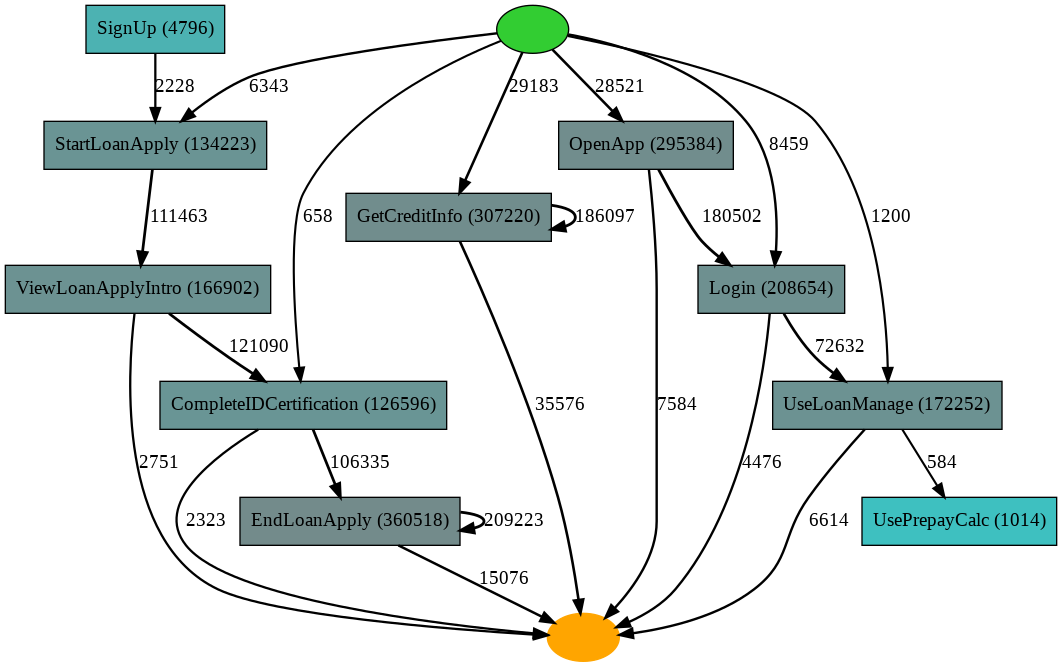

In [40]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


In [41]:
# 1

In [42]:
data=no_1_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities


{'GetCreditInfo': 305,
 'OpenApp': 270,
 'Login': 231,
 'EndLoanApply': 140,
 'ViewLoanApplyIntro': 122,
 'UseLoanManage': 114,
 'StartLoanApply': 75,
 'CompleteIDCertification': 67,
 'SignUp': 9}

In [43]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.9,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

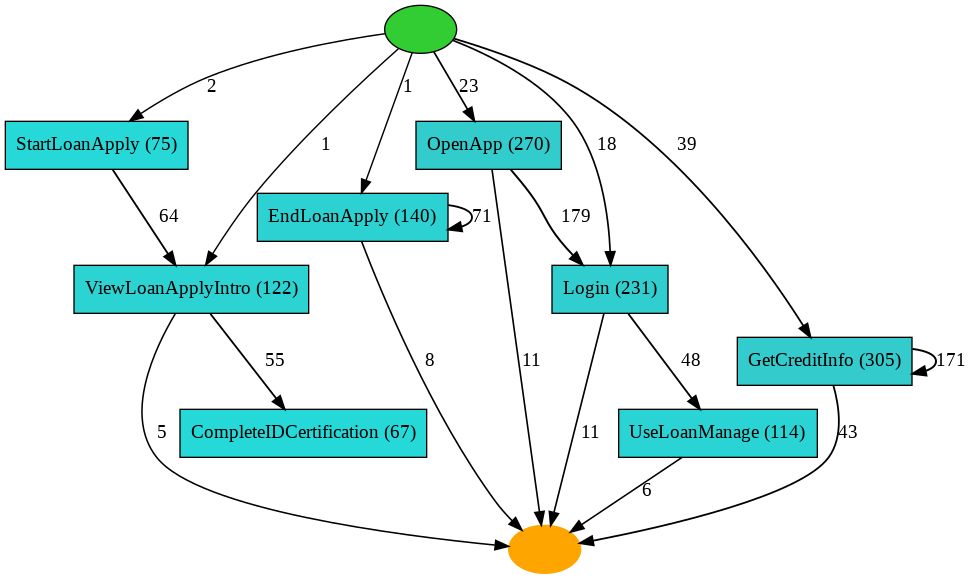

In [44]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [45]:
# 2

In [46]:
data=no_2_log.loc[:,['user_id','timestamp','event']]
data.rename(columns={'user_id':'case:concept:name','event':'concept:name','timestamp':'time:timestamp'},inplace=True)
parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY:'case:concept:name'}
event_log = log_converter.apply(data, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
data = to_data_frame.apply(event_log)
activities = attributes_filter.get_attribute_values(data, attribute_key='concept:name')
activities

{'OpenApp': 159,
 'Login': 125,
 'GetCreditInfo': 118,
 'EndLoanApply': 79,
 'UseLoanManage': 59,
 'ViewLoanApplyIntro': 43,
 'StartLoanApply': 28,
 'CompleteIDCertification': 23}

In [47]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH :0.5,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES :1,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH :0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH:3})

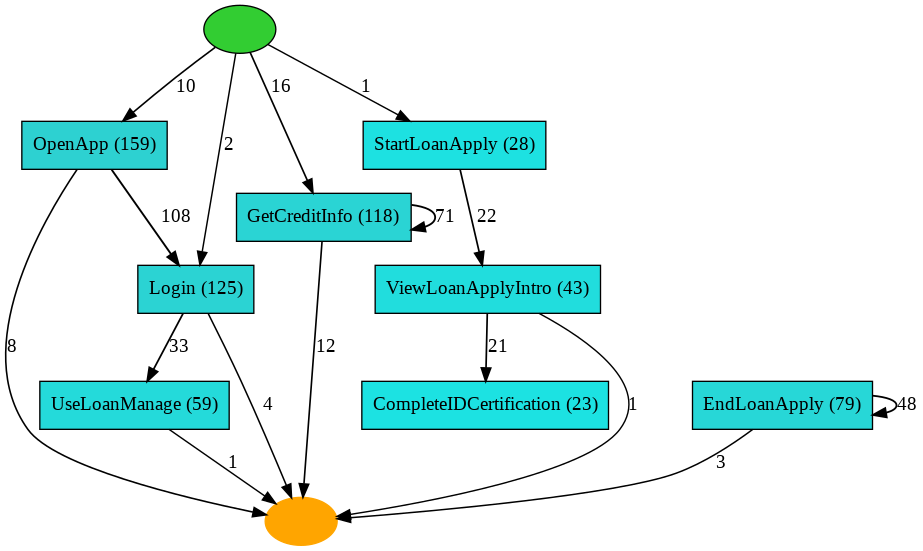

In [48]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)